(442, 10) (442,)


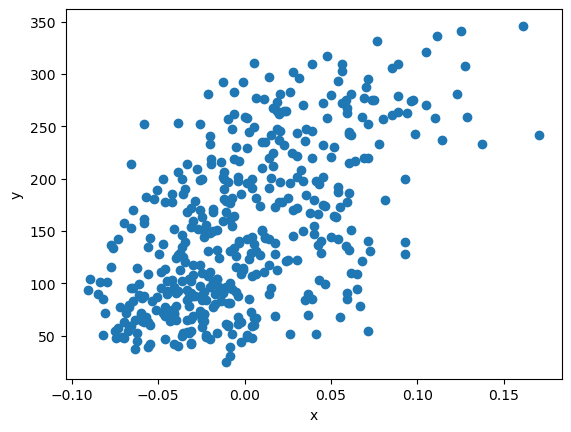

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
##############################
print(diabetes.data.shape, diabetes.target.shape)
##############################
diabetes.data[0:3]
##############################
diabetes.target[:3] # 당수치
##############################
# bmi와 당수치는 양의 상관관계
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x') # bmi
plt.ylabel('y') # 당수치
plt.show()
##############################
X = diabetes.data[:, 2]
y = diabetes.target
##############################

In [4]:
class Model:
    def __init__(self):
        self.w = 1.0 # 가중치 초기화
        self.b = 1.0 # 편향 초기화

    def forward(self, x):
        y_hat = x * self.w + self.b
        return y_hat

    def backward(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
 
    def fit(self, x, y, epochs=100):
        for i in range(epochs): # epoch만큼 반복
            for x_i, y_i in zip(x, y): # 모든 샘플 반복
                y_hat = self.forward(x_i) # 순전파
                # 오차 계산(실제값 - 예측값)
                err = -(y_i - y_hat)
                # 역전파
                w_grad, b_grad = self.backward(x_i, err)
                self.w -= w_grad # 가중치 수정
                self.b -= b_grad # 절편 수정
##############################
model = Model()
model.fit(X, y)
##############################

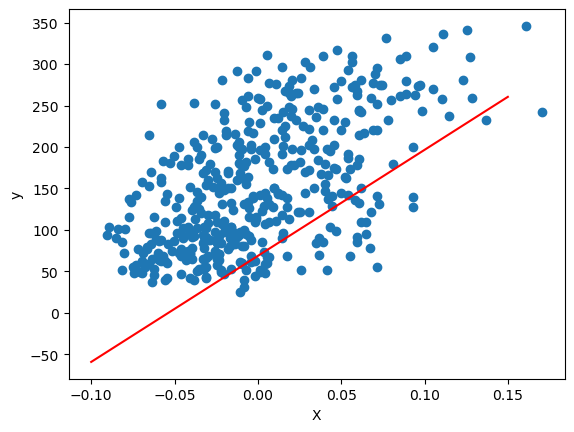

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)
pt1 = (-0.1, -0.2 * model.w + model.b)
pt2 = (0.15, 0.15 * model.w + model.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], c='r') # 회귀선
plt.xlabel('X')
plt.ylabel('y')
plt.show()